In [1]:
import numpy as np
import os
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import io
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
import time
%matplotlib inline
import math

In [2]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]

def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    for i in range(joints_3d.shape[0]):
#         plt.text(i, (joints_3d[i, 0], joints_3d[i, 0]), str(i))
        ax.text(joints_3d[i, 0], joints_3d[i, 1], joints_3d[i, 2], s=str(i))
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        if z_flip:
            ax.plot(z_pair, x_pair, y_pair, linewidth=3, antialiased=True)
        else:
            ax.plot(x_pair, y_pair,z_pair, linewidth=3, antialiased=True)
        dist = np.sqrt(np.square(x_pair[0]-x_pair[1]) + np.square(y_pair[0]-y_pair[1]) + np.square(z_pair[0]-z_pair[1]))
#         print ("distance ", i, "<->", limb_parents[i], " = ", dist)
    # ax.view_init(10, 210)   

def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
#     fig = plt.figure(frameon=False, figsize=(7, 7))
    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip=False)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)

def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    ax = fig.add_subplot(subplot, projection='3d')

    lim = np.max(np.abs(joints_3d))
#     print("lim", lim)
    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    return ax

def vis_3d(skeleton_3d):
    fig = plt.figure(frameon=False, figsize=(10, 10))

    ax = get_ax(skeleton_3d, fig, az=90, subplot='121')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_front_view")

    ax = get_ax(skeleton_3d, fig, az=60, ele=20, subplot='122')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_side_view")

    return fig

def skeleton_to_image(skltn):
    '''
    skltn: batch of 3d skeletons
    '''
    fig = vis_3d(skltn[0])
    fig.savefig("skeleton_3d.png")
#     plt.close(fig)
#     fig_img = cv2.imread("skeleton_3d.png")[:, :, ::-1]

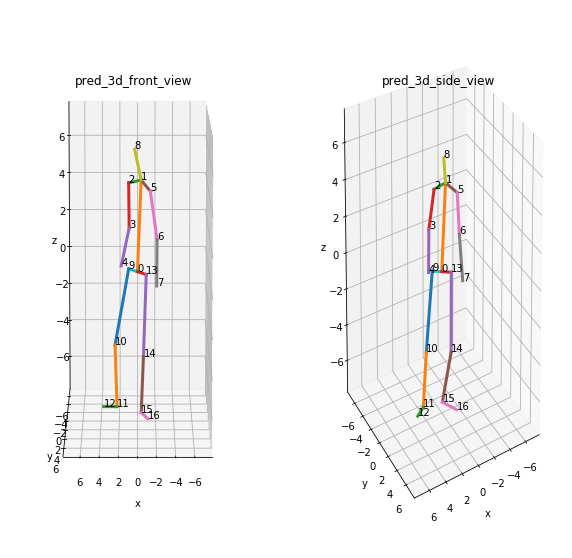

In [3]:
pose_path_3d = 'matfilename.mat'
# pose_path_3d = 'poses_3d/HipHop_HipHop1_C0.mat'
poses_3d = sio.loadmat(pose_path_3d)['pose_3d']
skeleton_images = skeleton_to_image(poses_3d[0:1])